A little notebook to help visualise the official results for personal use. Absolutely no guarantees are made.

**This is not a replacement for expert advice. Please listen to your local health authorities.**

Data automatically loaded from https://npgeo-corona-npgeo-de.hub.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0

In [1]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
#%matplotlib ipympl

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# load latest cases
rki_reports = pd.read_csv(
    "https://opendata.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0.csv", 
    parse_dates=['Meldedatum']
)

In [4]:
# load inhabitants per state (source: destatis 2019)
inhabitants = pd.read_csv('german_states_inhabitants_destatis_2019.csv')[['1_Auspraegung_Label','BEVSTD__Bevoelkerungsstand__Anzahl']]
inhabitants.columns = ['state','inhabitants']
inhabitants = inhabitants.set_index('state').inhabitants

In [5]:
# bring into easy-to-plot shape
cases  = rki_reports.pivot_table(
    index='Meldedatum', columns='Bundesland', values='AnzahlFall', aggfunc='sum'
).sort_index()
deaths = rki_reports.pivot_table(
    index='Meldedatum', columns='Bundesland', values='AnzahlTodesfall', aggfunc='sum'
).sort_index()
cases.index.name = deaths.index.name = 'Date'
# cumulate cases and fill in missing dates
#all_dates = pd.date_range(start=cases.index[0], end=cases.index[-1])
#casesc    = cases.cumsum().reindex(index=all_dates).fillna(method='ffill')
#deathsc   = deaths.cumsum().reindex(index=all_dates).fillna(method='ffill')

# rolling 7d average
cases7d = cases.rolling('7d').sum()
deaths7d = deaths.rolling('7d').sum()

cases7d_per_100k = cases7d / inhabitants * 10**5

In [6]:
# choose a random list of federal states to plot
plot_de = [
    'Bremen',
    'Berlin',
    'Hamburg',
    'Niedersachsen',
    'Bayern',
    'Nordrhein-Westfalen',
]

In [7]:
cases_germany  = cases.sum(axis=1)
#cases_germanyc = casesc.sum(axis=1)
cases_germany7d  = cases7d.sum(axis=1)
deaths_germany = deaths.sum(axis=1)
#deaths_germanyc = deathsc.sum(axis=1)
deaths_germany7d = deaths7d.sum(axis=1)
cases_germany7d.tail()

Date
2020-11-01    110199.0
2020-11-02    113018.0
2020-11-03    115370.0
2020-11-04    114698.0
2020-11-05    106818.0
dtype: float64

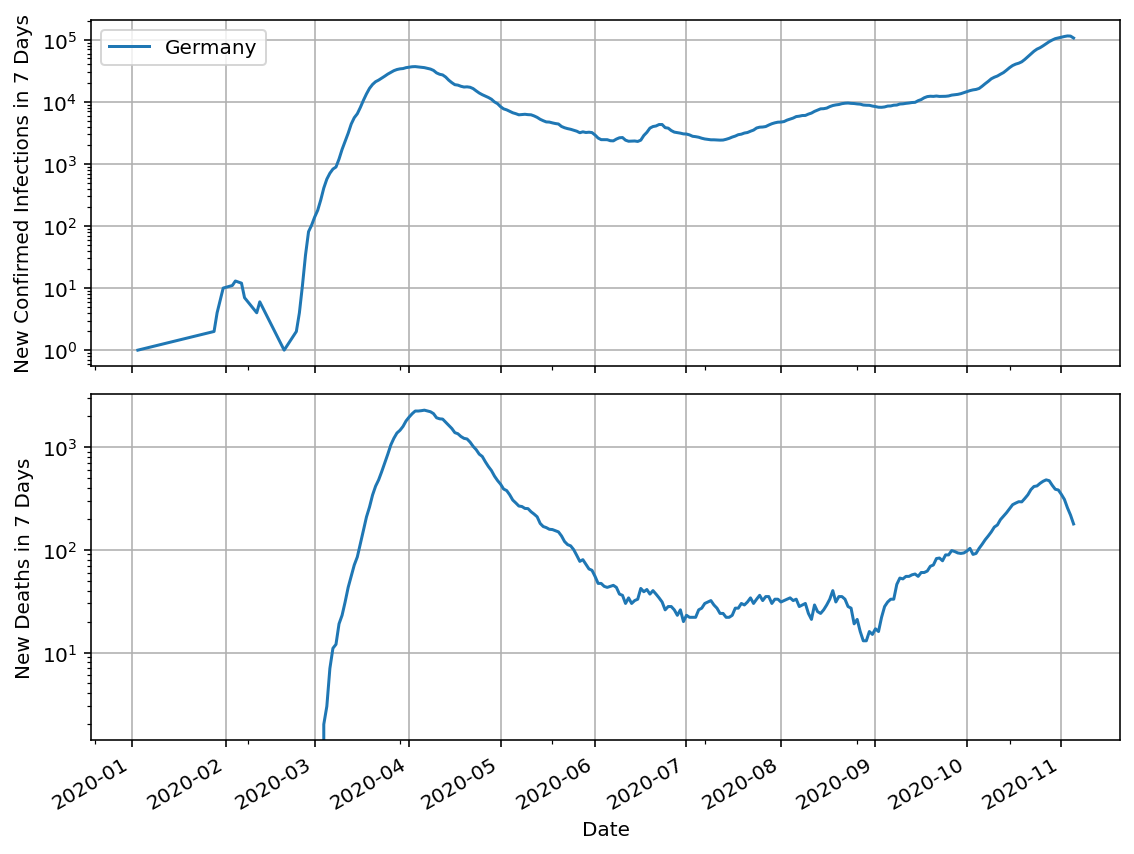

In [8]:
plt.close(1)
fig1, ax1 = plt.subplots(nrows=2, figsize=(8, 6), sharex=True, num=1)

cases_germany7d.plot(ax=ax1[0], logy=True)
deaths_germany7d.plot(ax=ax1[1], logy=True)


ax1[0].set_ylabel('New Confirmed Infections in 7 Days')
ax1[1].set_ylabel('New Deaths in 7 Days')

ax1[0].legend(['Germany'])

for a in ax1:
    a.grid()

fig1.tight_layout()

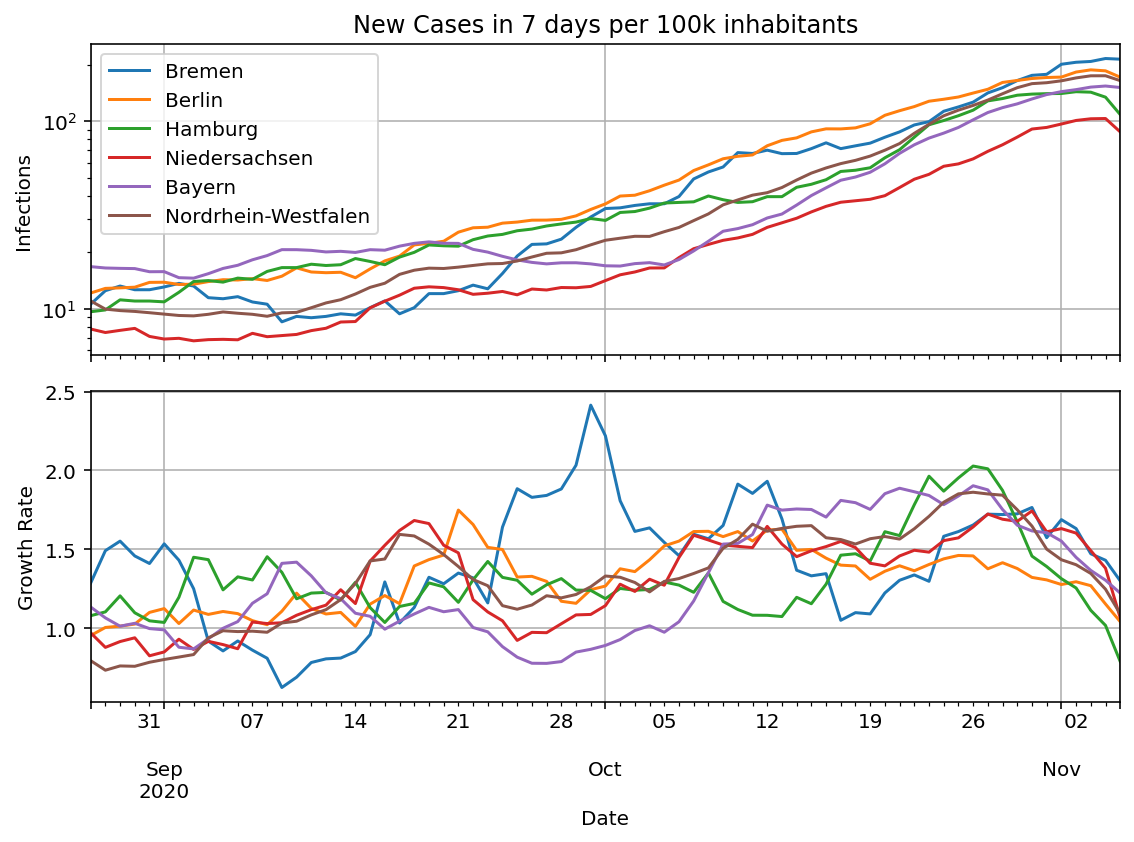

In [9]:
plt.close(2)
fig2, ax2 = plt.subplots(nrows=2, figsize=(8,6), sharex=True, num=2)

# show only last few weeks for better visibility
start = cases7d_per_100k.index[-1].floor('d') - pd.Timedelta('70d')
end   = cases7d_per_100k.index[-1].floor('d')

cases7d_per_100k.loc[start:end, plot_de].plot(ax=ax2[0], legend=False, logy=True)
(cases7d_per_100k / cases7d_per_100k.shift(7)).loc[start:end, plot_de].plot(ax=ax2[1], legend=False)

ax2[0].set_title('New Cases in 7 days per 100k inhabitants')
ax2[0].set_ylabel('Infections')
ax2[1].set_ylabel('Growth Rate')

ax2[0].legend(loc='upper left')

for a in ax2:
    a.grid()

fig2.tight_layout()

In [10]:
# save the above figure
#fig2.savefig('covid-19_timeseries_de.png')